In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
data = pd.read_csv('data_set .csv')
labels = pd.read_csv('labels.csv', delimiter=';')
data = data.merge(labels, how='left', left_on='appsflyer_id', right_on='Appsflyer_id')
data['is_fraud'] = ~data['Fraud_reasons'].isnull()

In [60]:
data.head()

,site_id,appsflyer_id,publisher,sub_site_id,date,app_id,app_version,attributed_touch_time,attributed_touch_type,operator,...,install_time,language,os_version,sdk_version,wifi,Appsflyer_id,App_id,Publisher (media_source),Site_id,Fraud_reasons
0,0,148552020,AA,0,2017-10-17,id966165025,3006005000,2017-10-17 21:20:31,click,NaN,...,2017-10-17 21:23:30,en-GB,10.3.3,v4.8.0,0,NaN,NaN,NaN,NaN,NaN
1,2588,6912501,AA,1133,2017-10-08,ng.jiji.app,3004002000,2017-10-08 17:46:52,click,MTN NG,...,2017-10-08 17:47:02,English,7.0,v4.8.3,0,NaN,NaN,NaN,NaN,NaN
2,2588,142889582,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 11:00:39,click,MTN - NG,...,2017-10-06 11:00:57,English,5.1,v4.8.3,0,NaN,NaN,NaN,NaN,NaN
3,2588,491337173,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:38:31,click,Airtel,...,2017-10-06 13:38:55,français,4.4.2,v4.8.3,0,NaN,NaN,NaN,NaN,NaN
4,2588,156920862,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:59:55,click,MTN NG,...,2017-10-06 14:29:37,English,6.0,v4.8.3,0,NaN,NaN,NaN,NaN,NaN


In [8]:
labels.head()

,Appsflyer_id,App_id,Publisher (media_source),Site_id,Fraud_reasons
0,740548623,ng.jiji.app,BR,4601,bots
1,151985749,ng.jiji.app,BN,1545,click_spamming
2,70156806,ng.jiji.app,BR,4601,bots
3,270410139,ng.jiji.app,BR,4601,bots
4,123443599,ng.jiji.app,BN,1838,tti_fraud


In [23]:
data.shape

(461475, 24)

In [24]:
labels.shape

(93453, 5)

In [64]:
def plot_distributions(df, column, min_limit=0):
    plt.figure(figsize=(10,5))
    labels_value_counts = df[column].value_counts() 
    labels_value_counts = labels_value_counts[labels_value_counts > min_limit]
    labels_value_counts.plot(kind = 'bar', rot=False)
    plt.title(column + ' distribution')

### Fraud reasons distribution

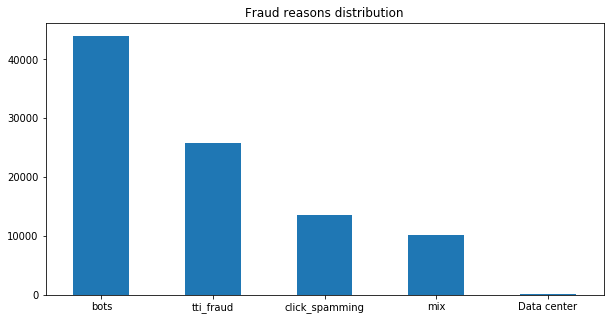

In [27]:
plot_distributions(labels, 'Fraud_reasons')

### Almost all are android app installs

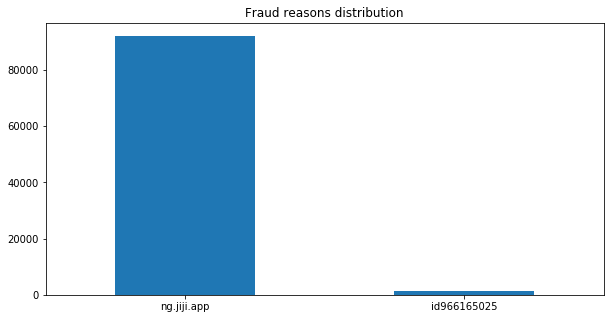

In [29]:
plot_distributions(labels, 'App_id')

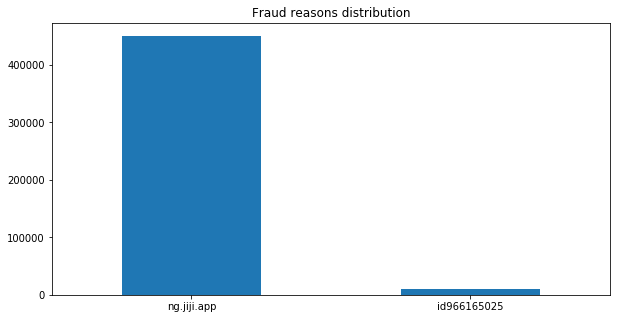

In [31]:
plot_distributions(data, 'app_id')

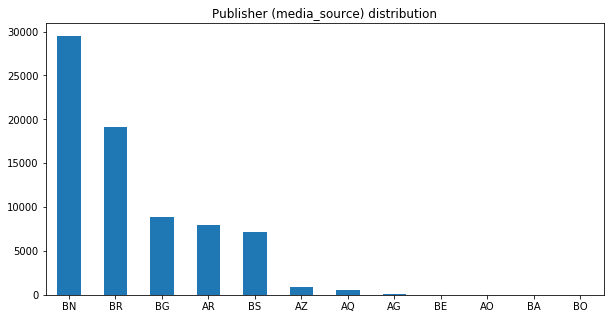

In [35]:
plot_distributions(labels, 'Publisher (media_source)')

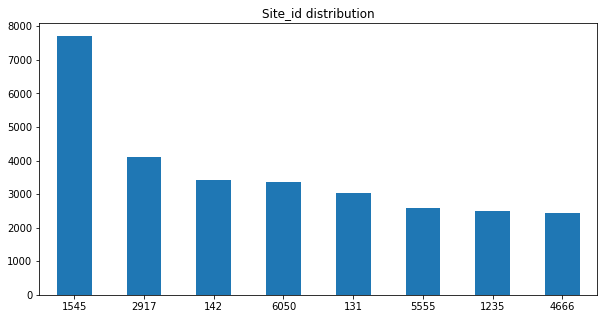

In [67]:
plot_distributions(labels, 'Site_id', 2000)

### The vast majority of installs are not via wifi

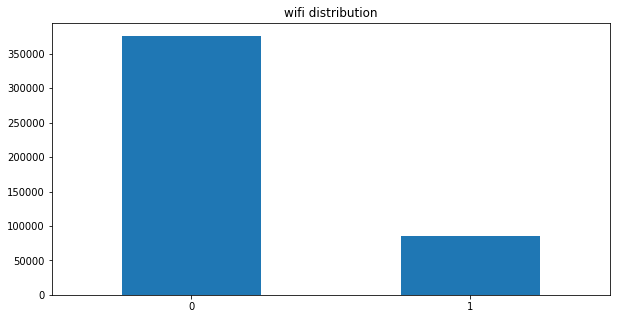

In [71]:
plot_distributions(data, 'wifi')

### If the install is via wifi it is just 25% less likely that it is a fraud

,is_fraud
wifi,
0,0.178389
1,0.747138


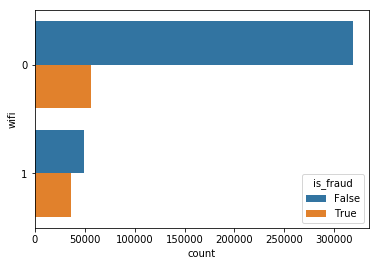

In [90]:
ax = sns.countplot(y='wifi', hue='is_fraud', data=data)
data.groupby('wifi').agg({'is_fraud': lambda x: x.sum()/(~x).sum()})

### There are some app versions that have 50% percent fraud installs

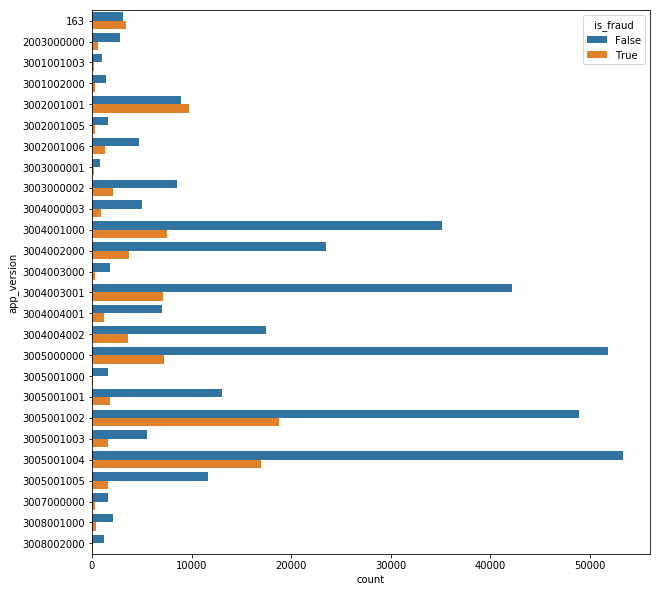

In [95]:
app_version_value_counts = data['app_version'].value_counts()
plt.figure(figsize=(10,10))
ax = sns.countplot(y='app_version', hue='is_fraud', data=data[
    data['app_version'].isin(app_version_value_counts[app_version_value_counts > 1000].index.values)])

### All frauds are have attributed_touch_type = click

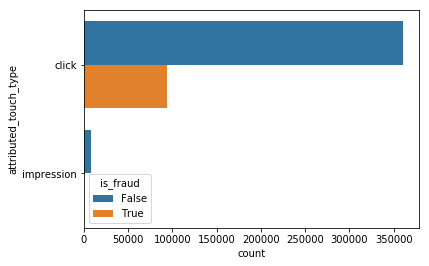

In [96]:
ax = sns.countplot(y='attributed_touch_type', hue='is_fraud', data=data)

### There is no really fraud operators

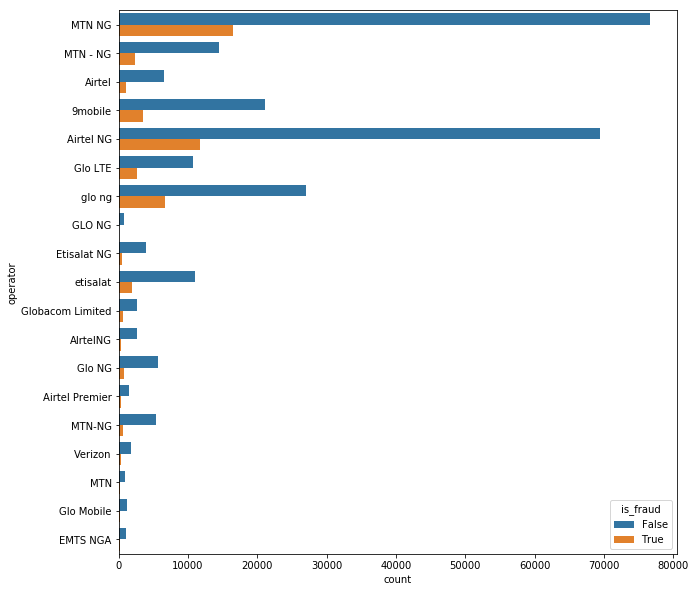

In [103]:
operator_value_counts = data['operator'].value_counts()
plt.figure(figsize=(10,10))
ax = sns.countplot(y='operator', hue='is_fraud', data=data[
    data['operator'].isin(operator_value_counts[operator_value_counts > 500].index.values)])

In [106]:
language_value_counts = data['lanugage'].value_counts()
plt.figure(figsize=(10,10))
ax = sns.countplot(y='language', hue='is_fraud', data=data[
    data['language'].isin(language_value_counts[language_value_counts > 500].index.values)])

KeyError: 'lanugage'